In [6]:
!pip install opencv-contrib-python
!pip install controlnet_aux
!pip install diffusers
!pip install transformers==4.29
!pip install xformers

  Obtaining dependency information for xformers from https://files.pythonhosted.org/packages/32/e7/27003645ef99e7571fb6964cd2f39da3f1b3f3011aa00bb2d3ac9b790757/xformers-0.0.26.post1-cp310-cp310-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for torch==2.3.0 from https://files.pythonhosted.org/packages/43/e5/2ddae60ae999b224aceb74490abeb885ee118227f866cb12046f0481d4c9/torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.1.105 from https://files.pythonhosted.org/packages/b6/9f/c64c03f49d6fbc56196664d05dba14e3a561038a81a638eeb47f4d4cfd48/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for nvidia-cuda-runtime-cu12==12.1.

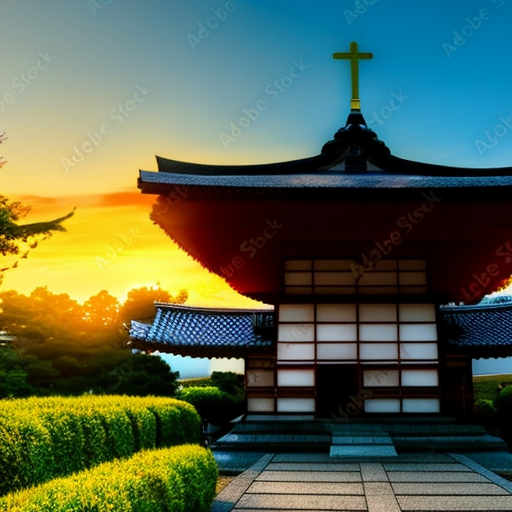

In [8]:
from diffusers.utils import load_image

image = load_image(
    "./test_imgs/e1.png"
)
image

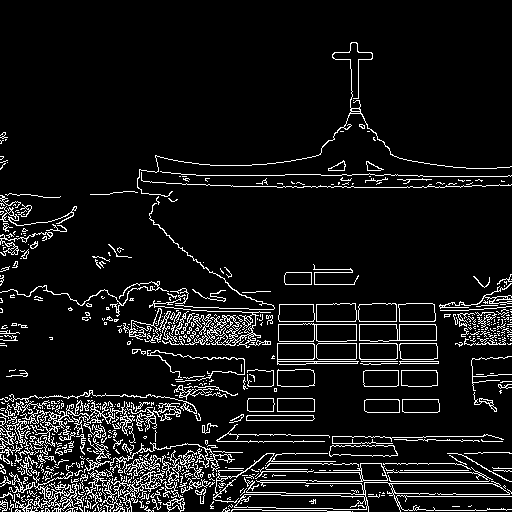

In [9]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

In [10]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [11]:
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)


In [12]:
generator = torch.manual_seed(42)

In [13]:
pipe.enable_model_cpu_offload()

  0%|          | 0/20 [00:00<?, ?it/s]

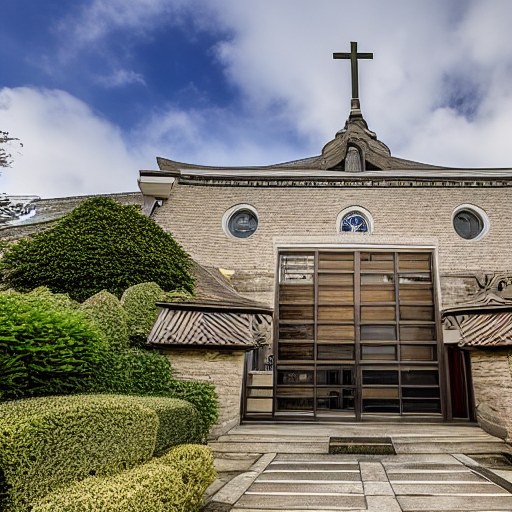

In [14]:

prompt = "Make it a church"
output = pipe(
    prompt,
    canny_image,
    negative_prompt="lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=20,
    generator=generator,
)
output.images[0]